In [29]:
import pandas as pd

# Alimentando o código com o CSV
df = pd.read_csv('https://raw.githubusercontent.com/gabrooo/CP_I_IA_-_Machine_Learning/main/CSV/urls_phishing_checkpoint1.csv')

# Separa o dataframe em 2 subconjuntos
# 1 = phishing
# 0 = legítima

df_phishing = df[df['phishing'] == 1]
df_legit = df[df['phishing'] == 0]

# declarando a seed p/ amostragem
random_state = 2023

# Selecionar uma amostra de 4000 observações
sample_phishing = df_phishing.sample(n=2000, random_state=random_state)
sample_legit = df_legit.sample(n=2000, random_state=random_state)

# Concatena as 2 amostras
sample_df = pd.concat([sample_phishing, sample_legit])

# Exibirá o top 5 da amostra
sample_df.head()

,urls,phishing,domain,ip,at,length_url,depth_url,double_slash,http_https,shortening_services,hyphen,dns,age_domain,end_period_domain,country
1627,https://tecnoforms.com.ar/gandi/?redirect=http...,1,tecnoforms.com.ar,1,0,288,2,0,0,0,0,1,10.0,2025-05,Russia
4873,https://docs.google.com/drawings/d/14zgar65OtL...,1,docs.google.com,1,0,79,3,0,0,0,0,1,26.0,2028-09,Japan
3640,https://vitale-renouvellement-fr.com/,1,vitale-renouvellement-fr.com,1,0,37,1,0,0,0,1,1,0.0,2025-08,Belarus
1251,https://bit.ly/4dehWAg,1,bit.ly,1,0,22,1,0,0,1,0,1,16.0,2032-05,Australia
2506,https://docs.google.com/presentation/d/e/2PACX...,1,docs.google.com,1,0,175,5,0,0,0,0,1,26.0,2028-09,China


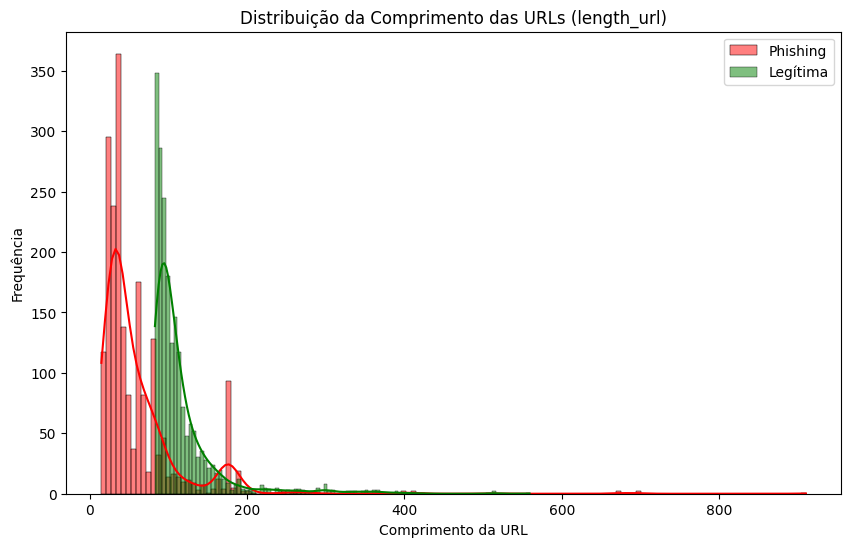

Phishing URLs
count    2000.000000
mean       60.986000
std        58.948641
min        15.000000
25%        30.000000
50%        40.000000
75%        70.000000
max       910.000000
Name: length_url, dtype: float64

Legitimate URLs
count    2000.000000
mean      115.877500
std        48.428599
min        83.000000
25%        90.000000
50%       101.000000
75%       120.000000
max       559.000000
Name: length_url, dtype: float64


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# tratando e analisando a var "length_url" das URLs de phishing
plt.figure(figsize=(10, 6))
sns.histplot(sample_phishing['length_url'], kde=True, color='red', label='Phishing')
sns.histplot(sample_legit['length_url'], kde=True, color='green', label='Legítima')
plt.title('Distribuição da Comprimento das URLs (length_url)')
plt.xlabel('Comprimento da URL')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir estatísticas descritivas da variável "length_url" para ambos os subconjuntos
print("Phishing URLs")
print(sample_phishing['length_url'].describe())
print("\nLegitimate URLs")
print(sample_legit['length_url'].describe())

In [34]:
# Carregar o arquivo não rotulado
df_not_label = pd.read_csv('https://raw.githubusercontent.com/gabrooo/CP_I_IA_-_Machine_Learning/main/CSV/urls_phishing_checkpoint1_not_label.csv')

# Contar a frequência de domínios no dataset
domain_counts = df_not_label['domain'].value_counts()

# Exibir os domínios com maior frequência
print(domain_counts.head(10))

domain
almardoof.com                                                                       1
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppwbohfmymdlu3y.ipfs.nftstorage.link    1
fazenda.gov.br                                                                      1
distractify.com                                                                     1
mylust.com                                                                          1
docs.google.com                                                                     1
campsite.bio                                                                        1
transxkvv.world                                                                     1
matemcskilpogin.gitbook.io                                                          1
utadc.com                                                                           1
Name: count, dtype: int64


In [45]:
# Calcular a comprimento média das URLs de phishing e legítimas
mean_depth_phishing = sample_phishing['length_url'].mean()
mean_depth_legit = sample_legit['length_url'].mean()

# Irá prever se é um phishing baseado no comprimeto
def predict_phishing(length_url):
  if length_url > (mean_depth_phishing + mean_depth_legit) / 2:
    return 1  # Phishing
  else:
    return 0  # Legítima

# Aplicar a função de previsão ao dataset não rotulado
df_not_label['prediction'] = df_not_label['length_url'].apply(predict_phishing)

# Agrupar por domínio e calcular a precisão da previsão
domain_predictions = df_not_label.groupby('domain')['prediction'].agg(['sum', 'count'])
domain_predictions['accuracy'] = domain_predictions['sum'] / domain_predictions['count']

# filtrp dos domains com 80% ou mais de acuracia
high_accuracy_domains = domain_predictions[domain_predictions['accuracy'] >= 0.8]

# Exibe
print(high_accuracy_domains)

                                                    sum  count  accuracy
domain                                                                  
akhbarelyom.com                                       1      1       1.0
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppw...    1      1       1.0
bdnews24.com                                          1      1       1.0
deadspin.com                                          1      1       1.0
docs.google.com                                       1      1       1.0
extratorrent.cc                                       1      1       1.0
fazenda.gov.br                                        1      1       1.0
olx.ro                                                1      1       1.0
torcache.net                                          1      1       1.0
twitter.com                                           1      1       1.0


In [48]:
# Calcular a comprimento média das URLs de phishing e legítimas
mean_depth_phishing = sample_phishing['length_url'].median()
mean_depth_legit = sample_legit['length_url'].median()

print (mean_depth_phishing, mean_depth_legit)

40.0 101.0
